data36.com by Tomi Mester
    
    AUTHOR: Tamas Ujhelyi 

### Polynomial Regression in Python using scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Coding a polynomial regression model with a single feature

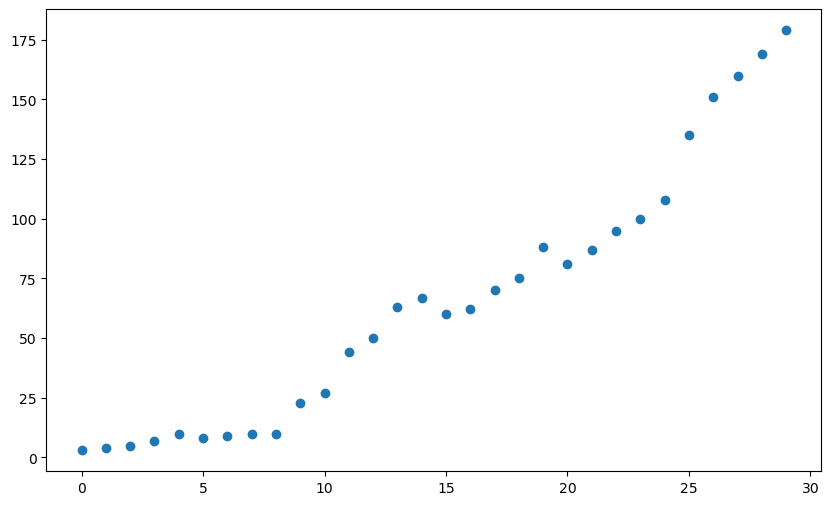

In [2]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

Establishing the degree of the polynomial

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly

PolynomialFeatures(include_bias=False)

Creating the new features

In [4]:
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_features

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 11., 121.],
       [ 12., 144.],
       [ 13., 169.],
       [ 14., 196.],
       [ 15., 225.],
       [ 16., 256.],
       [ 17., 289.],
       [ 18., 324.],
       [ 19., 361.],
       [ 20., 400.],
       [ 21., 441.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.],
       [ 25., 625.],
       [ 26., 676.],
       [ 27., 729.],
       [ 28., 784.],
       [ 29., 841.]])

Creating the polynomial regression model

In [5]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)
y_predicted

array([  1.70806452,   3.04187987,   4.70292388,   6.69119657,
         9.00669792,  11.64942794,  14.61938662,  17.91657397,
        21.54098999,  25.49263467,  29.77150802,  34.37761004,
        39.31094073,  44.57150008,  50.1592881 ,  56.07430478,
        62.31655014,  68.88602415,  75.78272684,  83.00665819,
        90.55781821,  98.4362069 , 106.64182425, 115.17467027,
       124.03474495, 133.22204831, 142.73658033, 152.57834101,
       162.74733037, 173.24354839])

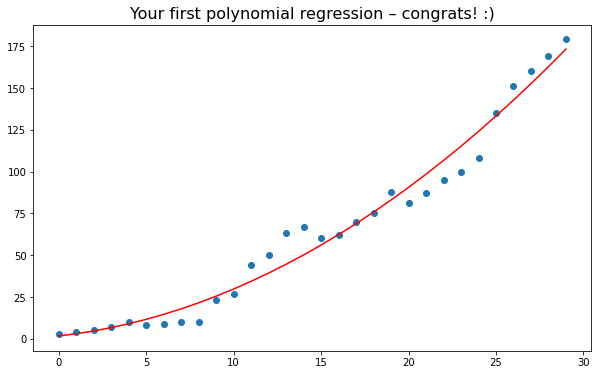

In [45]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

## Coding a polynomial regression model with multiple features

In [6]:
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2*x_1**2 + 3*x_1 + 2 + np.random.randn(100, 1)*20

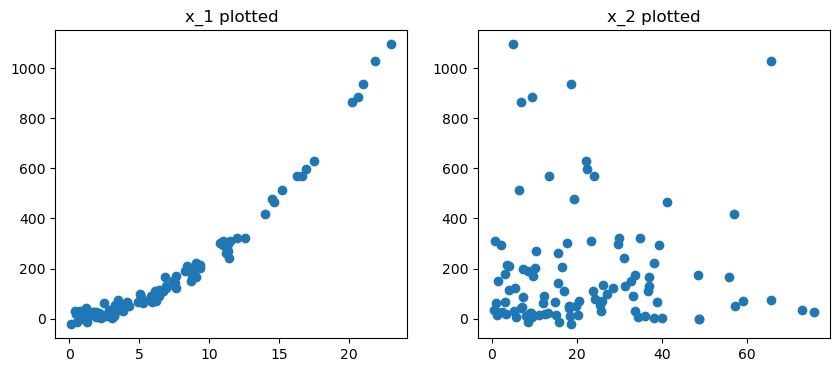

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(x_1, y)
axes[1].scatter(x_2, y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

In [8]:
df = pd.DataFrame({"x_1":x_1.reshape(100,), "x_2":x_2.reshape(100,), "y":y.reshape(100,)}, index=range(0,100))
df

,x_1,x_2,y
0,16.243454,13.413857,570.412369
1,6.117564,36.735231,111.681987
2,5.281718,12.104749,62.392124
3,10.729686,17.807356,303.538953
4,8.654076,32.847355,151.109269
...,...,...,...
95,0.773401,48.823150,-0.430738
96,3.438537,18.069578,44.308720
97,0.435969,12.608466,19.383456
98,6.200008,24.328550,78.371729


Defining the training and the test data

In [9]:
from sklearn.model_selection import train_test_split
X, y = df[["x_1", "x_2"]], df["y"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

Creating a polynomial regression model

In [10]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_y_predicted

array([ 41.6350313 ,  39.42128746, 452.06683015, 110.51727736,
         2.65094349, 144.27230078, 185.75697454,  10.81034621,
       462.83508143, 566.27203227,  -5.53330574, 125.27478433,
       185.59939781, 168.88392753, 317.09608594, 171.92507502,
        22.91712564, 167.36531564,  28.04318899,  44.46072362,
        97.92748209,  13.34154912,   0.66046295, 131.74620326,
       431.8011814 , 270.05259063,  22.60712417,  34.93332853,
        33.95914936,  19.73818115])

In [11]:
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

20.93770783907853

Creating a linear regression model to compare

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_y_predicted

array([  41.63309114,    0.83556899,  504.1503167 ,  159.30135668,
       -103.29453878,  206.69380231,  256.90218623,  -40.13222578,
        500.44220098,  586.15382451, -116.48989847,  182.51836141,
        262.12751533,  243.77372104,  388.73672059,  243.92985845,
         -4.39080137,  240.43477218,   10.43622695,   46.8066603 ,
        137.87116117,  -68.2726426 ,  -89.27914233,  195.82069617,
        463.40741474,  343.008296  ,  -36.15407314,   23.69815202,
         -8.53868937,  -87.39295134])

In [13]:
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

62.30248745387855

Linear regression equation

In [14]:
lin_reg_model.coef_

array([43.73176255, -0.53140809])

In [15]:
lin_reg_model.intercept_

-117.07280081594823

$y = ß_0 + ß_1x\_1 + ß_2x\_2$

$y = -117.072 + 43.731x\_1 - 0.531x\_2$

Polynomial regression equation

In [16]:
poly_reg_model.coef_

array([ 3.61945509, -1.0859955 ,  1.89905813,  0.0207338 ,  0.01300394])

In [17]:
poly_reg_model.intercept_

14.123436038978411

$y = ß_0 + ß_1x\_1 + ß_2x\_2 + ß_3x\_1^2 + ß_4x\_2^2 + ß_5x\_1x\_2$

$y = 14.123 + 3.619x\_1  - 1.085x\_2 + 1.899x\_1^2 + 0.020x\_2^2 + 0.013x\_1x\_2$

## Using pipeline

In [18]:
X, y = df[["x_1", "x_2"]], df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.pipeline import make_pipeline

poly_reg_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)

from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

20.93770783907853

## Finding the best degree

Best degree 2 with RMSE 20.93770783907853


Text(0, 0.5, 'RMSE')

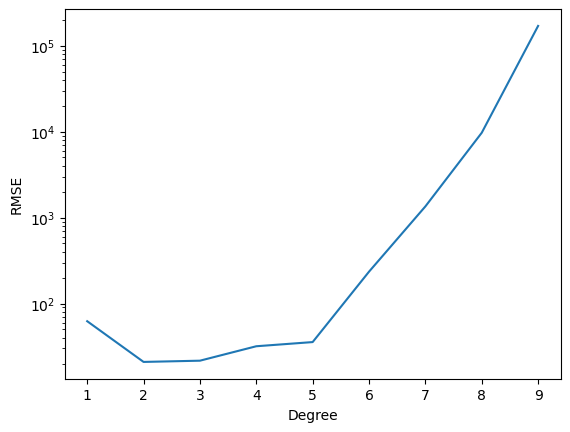

In [19]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly_reg_model = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
    poly_reg_model.fit(X_train, y_train)
    poly_reg_y_predicted = poly_reg_model.predict(X_test)

    poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))    
    rmses.append(poly_reg_rmse)

    # Cross-validation of degree
    if min_rmse > poly_reg_rmse:
        min_rmse = poly_reg_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
plt.plot(degrees, rmses)
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('RMSE')